# Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


# Attribute Information1) 
Passenger id- Unique Id of the passenger2) 
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd3) )
Survived- Survived (0 = No; 1 = Ye4) s)
Name- Name of the passen5) ger
Sex- Sex of the passenger (Male, Fem6) ale)
Age- Age of the pass7) enger
Sibsp- Number of Siblings/Spouses 8) Aboard
Parch- Number of Parents/Children9)  Aboard
Ticket- Tick
10) Fare- Passenger Fare (British pound)11) 
Cabin- Cabin12) 
Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)# 

Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Titanic/titanic_train.csv
t Number


In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [573]:
# Loading Dataset into Dataframe
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')

In [574]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# EDA

In [575]:
# Dimension of dataset
df.shape

(891, 12)

Dataset has 891 rows and 12 columns. 11 columns are independent Variable and 1 is Target.

In [576]:
# Checking Columns name
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1) Dataset has three types of data(float, int, object).
2) Null values are present in the dataset. Most in Cabin column followed by age column.

# Null Values

In [578]:
#Checking total number of null values present in dataser
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In cabin column 687 values are missing and 177 values are missing in Age. 
2 missing values in Embarked.
In Cabin column more than 70 % rows have missing values. Hence Dropping Cabin from dataset.

In [579]:
# Dropping Cabin
df.drop('Cabin',axis=1,inplace=True)

In [580]:
# Filling missing values in Age column
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [581]:
# Changing Dtatype of age from float to int
df['Age']=df['Age'].astype(int)

In [582]:
df['Age'].unique()

array([22, 38, 26, 35, 29, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
       28,  8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [583]:
# Replace Age 0 with 1
df['Age']=df['Age'].replace(0,1)

In [584]:
df.Age.unique()

array([22, 38, 26, 35, 29, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
       28,  8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 65,  5, 11, 45, 17, 32,
       16, 25,  1, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57, 80,
        6, 74])

In [585]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [586]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [587]:
# filling null values in Embarked column
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [588]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [589]:
# Checking unique values in Fare
df.Fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

Here we can see value as 0 in Fare column. Which we considring as Missing Value

In [590]:
# Checking which rows have 0 as Fare
df[df['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0.0,S
263,264,0,1,"Harrison, Mr. William",male,40,0,0,112059,0.0,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0.0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29,0,0,239853,0.0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0.0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29,0,0,239853,0.0,S
466,467,0,2,"Campbell, Mr. William",male,29,0,0,239853,0.0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29,0,0,239854,0.0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49,0,0,LINE,0.0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29,0,0,112052,0.0,S


In [591]:
# no of rows with fare value as 0
print('{} rows has 0 as Fare Value.'.format(df[df['Fare']==0].shape[0]))

15 rows has 0 as Fare Value.


In [592]:
# Replacing 0 to np.nan
df['Fare'].replace(0,np.nan,inplace=True)

In [433]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare           15
Embarked        0
dtype: int64

In [593]:
# Filling Missing Value in fare column with median of Fare.
df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('median'),inplace=True)

In [594]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Value Counts

In [595]:
# Value Counts of each column
for d in df.columns.to_list():
    print(df.value_counts(d))
    print('\n')

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Length: 891, dtype: int64


Survived
0    549
1    342
dtype: int64


Pclass
3    491
1    216
2    184
dtype: int64


Name
Abbing, Mr. Anthony                        1
Nysveen, Mr. Johan Hansen                  1
Nicholson, Mr. Arthur Ernest               1
Nicola-Yarred, Master. Elias               1
Nicola-Yarred, Miss. Jamila                1
                                          ..
Goodwin, Miss. Lillian Amy                 1
Goodwin, Mr. Charles Edward                1
Goodwin, Mrs. Frederick (Augusta Tyler)    1
Graham, Miss. Margaret Edith               1
van Melkebeke, Mr. Philemon                1
Length: 891, dtype: int64


Sex
male      577
female    314
dtype: int64


Age
29    197
24     31
30     27
22     27
28     27
     ... 
53      1
12      1
66      1
74      1
80      1
Length: 70, dtype: int64


SibSp
0    608
1    209
2     28
4     18
3     16
8  

In [596]:
# Checking no. of unique values in every column
for c in df.columns:
    print("Total no. unique values in {} column: ".format(c),df[c].nunique())
    print('\n')

Total no. unique values in PassengerId column:  891


Total no. unique values in Survived column:  2


Total no. unique values in Pclass column:  3


Total no. unique values in Name column:  891


Total no. unique values in Sex column:  2


Total no. unique values in Age column:  70


Total no. unique values in SibSp column:  7


Total no. unique values in Parch column:  7


Total no. unique values in Ticket column:  681


Total no. unique values in Fare column:  248


Total no. unique values in Embarked column:  3




PassengerId has uniqueId for every passenger, and passenger name is a object column and every passenger has unique Name. Hence we can drop Both These columns. 

In [597]:
# Dropping PassengerId and Name
df.drop('PassengerId',axis=1,inplace=True)

In [599]:
df.drop('Name',axis=1,inplace=True)

In [603]:
df.shape

(891, 9)

In [604]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 59.3+ KB


# Description of Dataset

In [605]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.552189,0.523008,0.381594,32.689318
std,0.486592,0.836071,12.996210,1.102743,0.806057,49.611639
min,0.000000,1.000000,1.000000,0.000000,0.000000,4.012500
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.500000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1) There is huge Differnce Between 75th percentile and max data in Age and Fare . Which infers the presence of outliers in these columns.
2) In Fare Column mean is Greater than median which means data is right Skewed.
3) SibSp and Parch are categorical Columns so there is no need to check skewness and outliers in these two.

# Graphical Analysis

Univariate Analysis

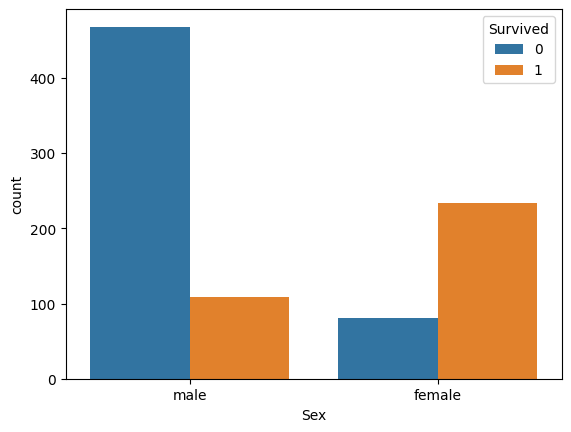

In [606]:
#Checking the Count of surviver in Gender class.

sns.countplot(x='Sex',data=df,hue='Survived')
plt.show()

Count of Female Survivor is Higher than Male Survivor.

Note :- 0 represent not survived and 1 represent survived

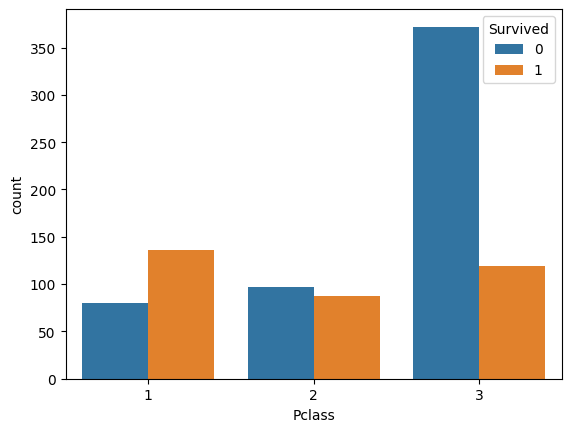

In [607]:
# Count of Surviver in each passenger class
sns.countplot(x='Pclass',data=df,hue='Survived')
plt.show()

Most number of people survived from Passenger Class 1 , followed by class 3. Class 2 has least number of survivers.

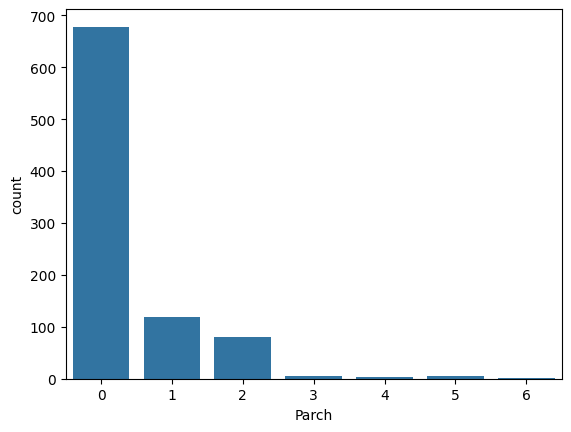

In [608]:
#Checking Count of Passengers who aboarded with their Parent or children.
sns.countplot(x='Parch',data=df)
plt.show()

Most no. Passengers aboarded Alone.

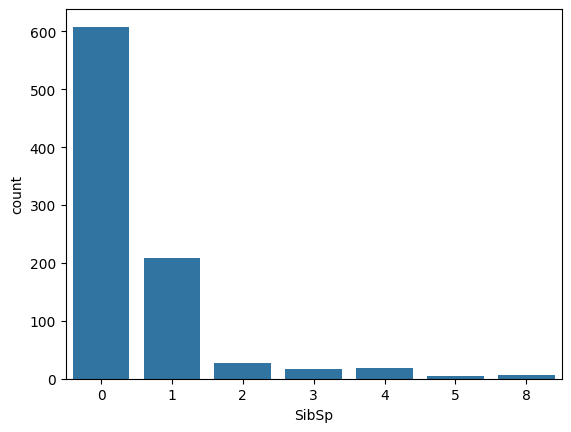

In [609]:
# Checking Count of Passengers who aboarded with their Siblings or Spouses.
sns.countplot(x='SibSp',data=df)
plt.show()

Passengers who aboarded alone has the highest count.

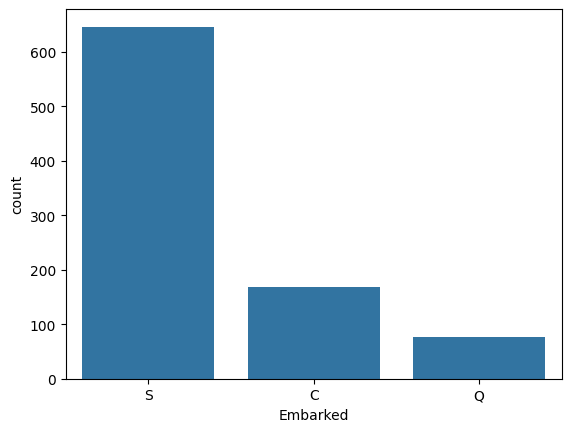

In [610]:
# Checking count of Passengers Embarked From each ports.
# Note :- C = Cherbourg; Q = Queenstown; S = Southampton.
sns.countplot(x='Embarked',data=df)
plt.show()

Most no. passengers Embarked from Southampton port.

0    549
1    342
Name: Survived, dtype: int64


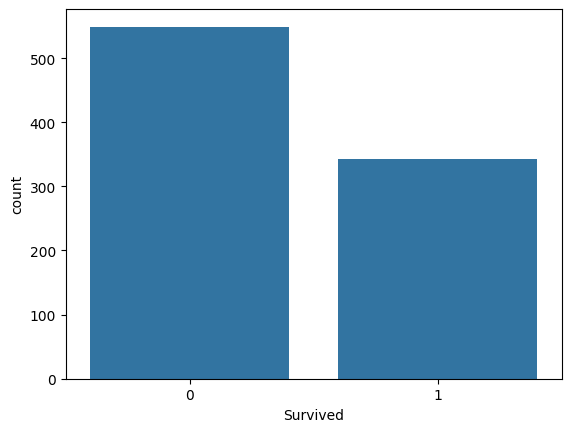

342 passengers Survived and 549 passengers didn't survived.


In [611]:
# Checking count of survivers
print(df.Survived.value_counts())
sns.countplot(x='Survived',data=df)
plt.show()
print("{} passengers Survived and {} passengers didn't survived.".format(df.Survived.value_counts()[1],df.Survived.value_counts()[0]))

Count of passengers who didn't survive is higher compared to passengers who survived.

Bivariate Analysis

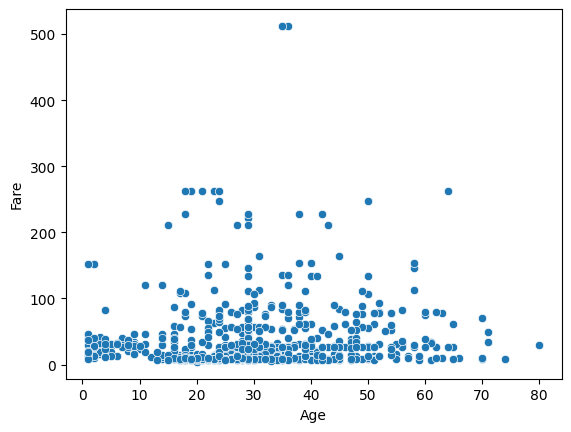

In [612]:
# Relation between Age and Fare
sns.scatterplot(x='Age',y='Fare',data=df)
plt.show()

Fare is not Dependent on Age.

Multivariate Analysis

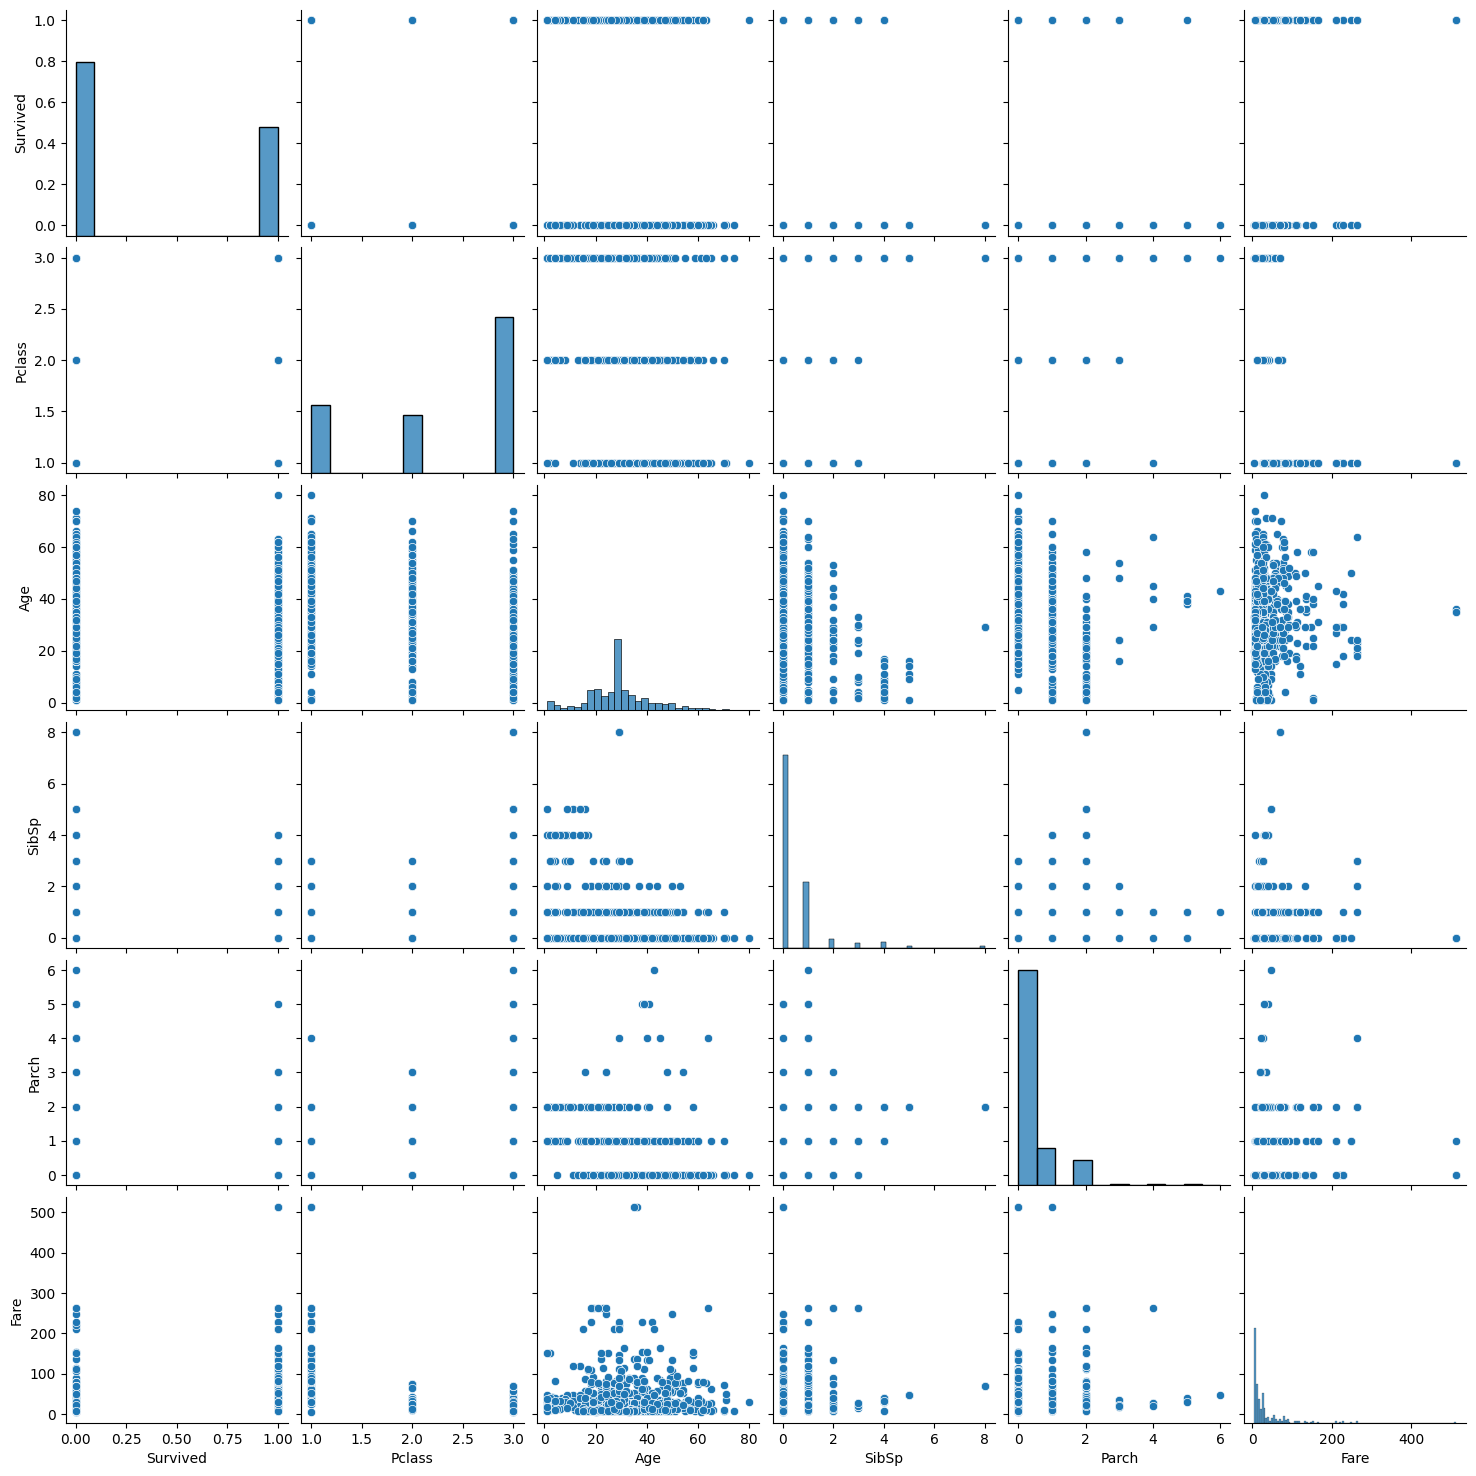

In [613]:
# Using Pairplot
sns.pairplot(df)
plt.show()

Here we can see multiple graphs. which confirms that:
1) Fare is right skewed.
2) Age and Fare is not related with each other.
3) Age has Little Correlation with SibSp

# Label Encoder

In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 59.3+ KB


In [451]:
from sklearn.preprocessing import LabelEncoder

In [615]:
# Encoding gender,ticket and Embarked column
df['Sex']=LabelEncoder().fit_transform(df['Sex'])
df['Ticket']=LabelEncoder().fit_transform(df['Ticket'])
df['Embarked']=LabelEncoder().fit_transform(df['Embarked'])

In [616]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    int32  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int32  
dtypes: float64(1), int32(4), int64(4)
memory usage: 48.9 KB


# Correlation

In [617]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.067134,-0.035322,0.081629,-0.164549,0.250383,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.335540,0.083081,0.018443,0.319869,-0.561542,0.162098
Sex,-0.543351,0.131900,1.000000,0.082729,-0.114631,-0.245489,0.059372,-0.175416,0.108262
Age,-0.067134,-0.335540,0.082729,1.000000,-0.232796,-0.176304,-0.069576,0.097206,-0.023260
SibSp,-0.035322,0.083081,-0.114631,-0.232796,1.000000,0.414838,0.079461,0.155271,0.068230
Parch,0.081629,0.018443,-0.245489,-0.176304,0.414838,1.000000,0.020003,0.211947,0.039798
Ticket,-0.164549,0.319869,0.059372,-0.069576,0.079461,0.020003,1.000000,-0.025872,-0.001729
Fare,0.250383,-0.561542,-0.175416,0.097206,0.155271,0.211947,-0.025872,1.000000,-0.219357
Embarked,-0.167675,0.162098,0.108262,-0.023260,0.068230,0.039798,-0.001729,-0.219357,1.000000


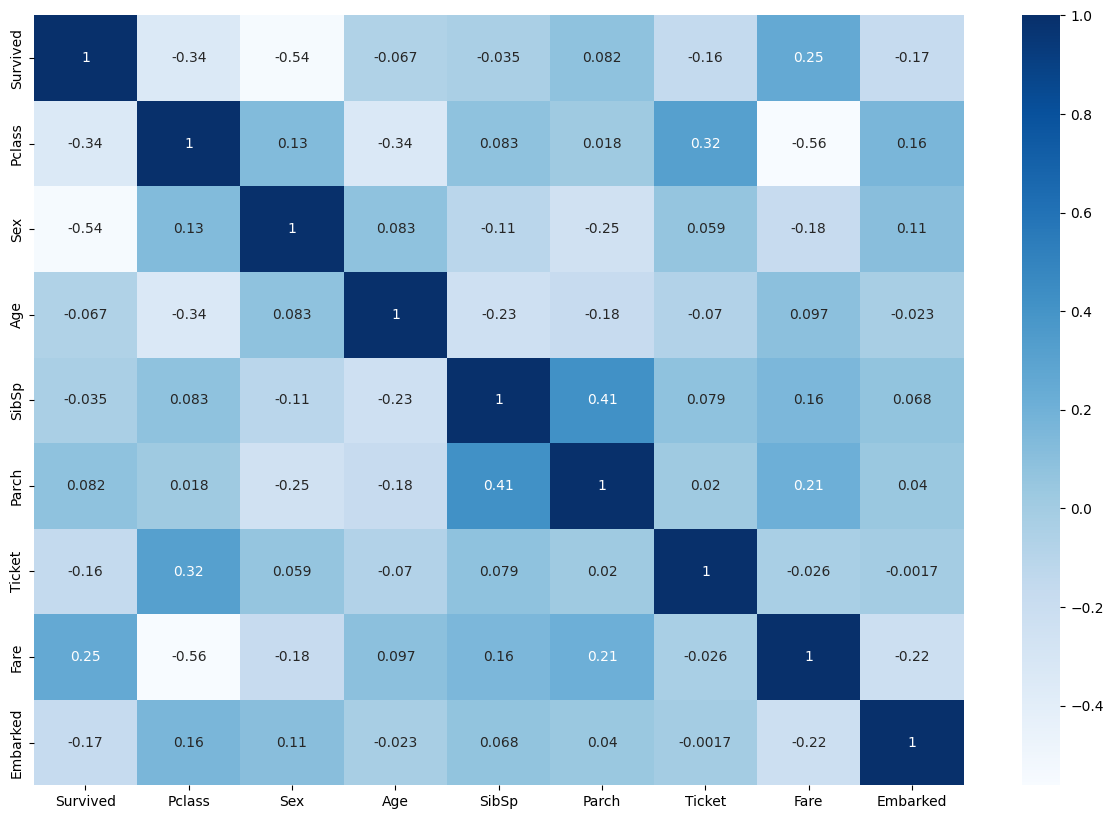

In [618]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

1) Any of the independent variable Doesn't have strong relation with other independent variables.
2) Gender has the Highest negative correlation with survived followed by Pclass.
3) Fare has the positive correlation with Survived.

In [619]:
df.shape

(891, 9)

In [620]:
# creating a copy of data to see model is performing Better with outliers or without outliers.
do=df.copy()

In [621]:
do.shape

(891, 9)

# Removing Outliers

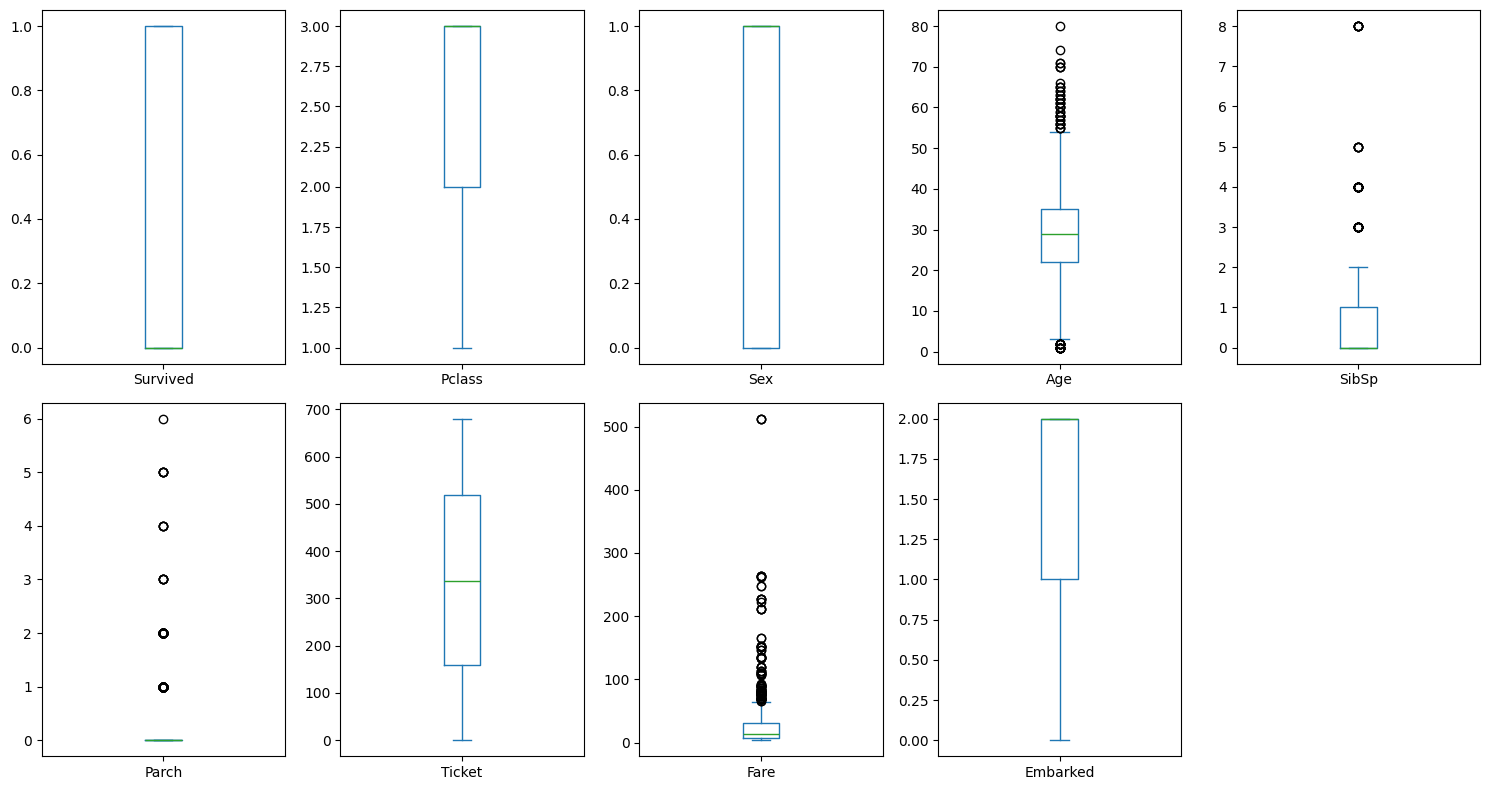

In [622]:
# Plotting boxplot to check outliers
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(15,8))
plt.tight_layout()
plt.show()

Outliers are present in Fare and Age Column.

In [467]:
# imporing zscore
from scipy.stats import zscore

In [623]:
z=np.abs(zscore(df[['Fare','Age']]))

In [624]:
# Threshold = 3
print(np.where(z>3))

(array([ 27,  88,  96, 116, 118, 258, 299, 311, 341, 377, 380, 438, 493,
       527, 557, 630, 672, 679, 689, 700, 716, 730, 737, 742, 745, 779,
       851], dtype=int64), array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1], dtype=int64))


In [625]:
z

,Fare,Age
0,0.513057,0.581433
1,0.778359,0.650386
2,0.499444,0.273478
3,0.411640,0.419420
4,0.496923,0.419420
...,...,...
886,0.397092,0.196490
887,0.054238,0.812400
888,0.186337,0.042512
889,0.054238,0.273478


In [626]:
# removing outliers
dfn=df[np.abs(z<3).all(axis=1)]

In [627]:
# Checking how many rows removed
print(df.shape)
print(dfn.shape)
print(" {} rows are removed.".format(df.shape[0]-dfn.shape[0]))

(891, 9)
(864, 9)
 27 rows are removed.


In [628]:
dfn1=dfn.copy()

# Dividing dataset

In [629]:
# Dividing data into x(input) and Y(output) variables.
x=dfn.drop('Survived',axis=1)
y=dfn['Survived']

In [630]:
print(x.shape)
print(y.shape)

(864, 8)
(864,)


Skewness

In [631]:
x.skew()

Pclass     -0.708375
Sex        -0.632203
Age         0.276455
SibSp       3.751753
Parch       2.840412
Ticket      0.012485
Fare        2.237929
Embarked   -1.328443
dtype: float64

In [632]:
# Creating Some copies to apply different skewness method.
xa=x.copy()
xb=x.copy()
xc=x.copy()
xd=x.copy()

In [633]:
# removing Skewness from Fare using cube root
xa['Fare']=np.cbrt(xa['Fare'])

In [634]:
xa.skew()

Pclass     -0.708375
Sex        -0.632203
Age         0.276455
SibSp       3.751753
Parch       2.840412
Ticket      0.012485
Fare        1.151673
Embarked   -1.328443
dtype: float64

In [635]:
# Using Square root
xa['Fare']=np.sqrt(xa['Fare'])

In [636]:
xa.skew()

Pclass     -0.708375
Sex        -0.632203
Age         0.276455
SibSp       3.751753
Parch       2.840412
Ticket      0.012485
Fare        0.923181
Embarked   -1.328443
dtype: float64

In [637]:
# Using Log
xa['Fare']=np.log(xa['Fare'])

In [638]:
xa.skew()

Pclass     -0.708375
Sex        -0.632203
Age         0.276455
SibSp       3.751753
Parch       2.840412
Ticket      0.012485
Fare        0.716203
Embarked   -1.328443
dtype: float64

In [639]:
# Using BoxCox
from scipy.stats import boxcox
xa['Fare']=boxcox(xa['Fare'],1)

In [640]:
xa.skew()

Pclass     -0.708375
Sex        -0.632203
Age         0.276455
SibSp       3.751753
Parch       2.840412
Ticket      0.012485
Fare        0.716203
Embarked   -1.328443
dtype: float64

In [641]:
xa['Fare']=boxcox(xa['Fare'],0)

In [642]:
xa.skew()

Pclass     -0.708375
Sex        -0.632203
Age         0.276455
SibSp       3.751753
Parch       2.840412
Ticket      0.012485
Fare             NaN
Embarked   -1.328443
dtype: float64

In [643]:
# Removing Skewness from Second copy of data
xb['Fare']=np.log(xb['Fare'])

In [644]:
xb.skew()

Pclass     -0.708375
Sex        -0.632203
Age         0.276455
SibSp       3.751753
Parch       2.840412
Ticket      0.012485
Fare        0.716203
Embarked   -1.328443
dtype: float64

In [645]:
xb['Fare']=np.sqrt(xb['Fare'])

In [646]:
xb.skew()

Pclass     -0.708375
Sex        -0.632203
Age         0.276455
SibSp       3.751753
Parch       2.840412
Ticket      0.012485
Fare        0.538265
Embarked   -1.328443
dtype: float64

In [647]:
#using cuberoot
xb['Fare']=np.cbrt(xb['Fare'])

In [648]:
xb.skew()

Pclass     -0.708375
Sex        -0.632203
Age         0.276455
SibSp       3.751753
Parch       2.840412
Ticket      0.012485
Fare        0.425656
Embarked   -1.328443
dtype: float64

Going Forward with xb

# Standard Scaler

In [649]:
from sklearn.preprocessing import StandardScaler

In [650]:
x1=pd.DataFrame(StandardScaler().fit_transform(xb),columns=xb.columns)
x1.head(3)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.801719,0.733053,-0.575070,0.433911,-0.463435,0.939747,-1.159031,0.572159
1,-1.641615,-1.364158,0.707565,0.433911,-0.463435,1.306235,1.548121,-2.002556
2,0.801719,-1.364158,-0.254411,-0.471642,-0.463435,1.672722,-1.013101,0.572159


# Multicolinearity

In [651]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [652]:
def MultiColinearity(data):
    vif=pd.DataFrame()
    vif['Columns']=data.columns
    vif['VIF']=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
    print(vif)

In [653]:
MultiColinearity(x1)

    Columns       VIF
0    Pclass  4.291342
1       Sex  1.118403
2       Age  1.212287
3     SibSp  1.777942
4     Parch  1.540338
5    Ticket  1.155746
6      Fare  4.835831
7  Embarked  1.043031


No Multicolinearity Present in dataset

# Class Imbalance

In [654]:
y.value_counts()

0    537
1    327
Name: Survived, dtype: int64

Here we can See that the differnce between class '0' and class '1' is 210. Hence Considering it as Class Imbalance problem.

In [655]:
# Importing Smote
from imblearn.over_sampling import SMOTE

In [656]:
smt=SMOTE()

In [657]:
x2,y2=smt.fit_resample(x1,y)

In [658]:
y2.value_counts()

0    537
1    537
Name: Survived, dtype: int64

Class Imbalance problem Rectified.

# Modeling

In [563]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

In [564]:
# Creating Function to find best random state
def Random_state(x,y):
    rs=0
    acc=0
    for i in range(1,301):
       gbc=GradientBoostingClassifier()
       x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
       gbc.fit(x_train,y_train)
       pred=gbc.predict(x_test)
       acs=accuracy_score(y_test,pred)
       if acs>acc:
           acc=+acs
           rs=+i
    print('Best accuracy {} on random state {}'.format(acc,rs))

In [769]:
Random_state(x2,y2)

Best accuracy 0.8947368421052632 on random state 56


Spliting Train Test Data

In [770]:
xtrain,xtest,ytrain,ytest=train_test_split(x3,y3,test_size=0.30,random_state=56)

In [771]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(751, 8)
(323, 8)
(751,)
(323,)


In [772]:
# Importing classification metrics
from sklearn.metrics import classification_report, confusion_matrix

In [773]:
# Importing Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

In [774]:
# Creating Variables for models
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
svc=SVC()
rfc=RandomForestClassifier()
gb=GaussianNB()
adc=AdaBoostClassifier()
gdc=GradientBoostingClassifier()
etc=ExtraTreesClassifier()
lr=LogisticRegression()
bgc=BaggingClassifier()

In [775]:
# creating list with classification models
models=[dtc,knn,svc,rfc,gb,adc,gdc,etc,lr,bgc]

In [776]:
# Iterating Each model
for m in models:
    m.fit(xtrain,ytrain)
    print(m)
    print('Accuracy_score',accuracy_score(ytest,m.predict(xtest)))
    print(confusion_matrix(ytest,m.predict(xtest)))
    print(classification_report(ytest,m.predict(xtest)))
    print('CrossValScore')
    score=cross_val_score(m,x2,y2)
    print(score)
    print(score.mean())
    print("difference between accuracy score and cv mean score for {} is".format(m),round(accuracy_score(ytest,m.predict(xtest))*100-score.mean()*100,2))
    print('*'*100)
    print('\n')

DecisionTreeClassifier()
Accuracy_score 0.8018575851393189
[[115  35]
 [ 29 144]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       150
           1       0.80      0.83      0.82       173

    accuracy                           0.80       323
   macro avg       0.80      0.80      0.80       323
weighted avg       0.80      0.80      0.80       323

CrossValScore
[0.76744186 0.78604651 0.8        0.8744186  0.86448598]
0.8184785916105195
difference between accuracy score and cv mean score for DecisionTreeClassifier() is -1.66
****************************************************************************************************


KNeighborsClassifier()
Accuracy_score 0.8111455108359134
[[129  21]
 [ 40 133]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       150
           1       0.86      0.77      0.81       173

    accuracy                           0.81       323
   macro a

Conclusion:-BaggingClassifier has 0.56 difference between Accuracy_score and cross val score. also giving 85 % accuracy. so we can consider it as the best performing model. 

# Model Performance without removing Outliers

In [777]:
do.shape

(891, 9)

In [778]:
#Seperating Data
input=do.drop('Survived',axis=1)
target=do['Survived']

In [779]:
print(input.shape)
print(target.shape)

(891, 8)
(891,)


In [780]:
# Removing Skewness
input.skew()

Pclass     -0.630548
Sex        -0.618921
Age         0.468700
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        4.786668
Embarked   -1.264823
dtype: float64

In [781]:
input1=input.copy()

In [782]:
input1['Fare']=np.log(input1['Fare'])

In [783]:
input1.skew()

Pclass     -0.630548
Sex        -0.618921
Age         0.468700
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        0.894909
Embarked   -1.264823
dtype: float64

In [784]:
# using cuberoot
input1['Fare']=np.cbrt(input1['Fare'])

In [785]:
input1.skew()

Pclass     -0.630548
Sex        -0.618921
Age         0.468700
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        0.580066
Embarked   -1.264823
dtype: float64

In [786]:
# using square root
input1['Fare']=np.sqrt(input1['Fare'])

In [787]:
input1.skew()

Pclass     -0.630548
Sex        -0.618921
Age         0.468700
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        0.509297
Embarked   -1.264823
dtype: float64

In [788]:
# using boxcox
input1['Fare']=boxcox(input1['Fare'],0)

In [736]:
input1.skew()

Pclass     -0.630548
Sex        -0.618921
Age         0.468700
SibSp       3.695352
Parch       2.749117
Ticket      0.000246
Fare        0.456977
Embarked   -1.264823
dtype: float64

In [789]:
# Scaling input data
xo=pd.DataFrame(StandardScaler().fit_transform(input1),columns=input1.columns)
xo.head(3)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.827377,0.737695,-0.581433,0.432793,-0.473674,0.918966,-1.171519,0.585954
1,-1.566107,-1.355574,0.650386,0.432793,-0.473674,1.282625,1.395802,-1.942303
2,0.827377,-1.355574,-0.273478,-0.474545,-0.473674,1.646283,-1.024429,0.585954


In [790]:
# Checking Multicolinearity
MultiColinearity(xo)

    Columns       VIF
0    Pclass  4.432144
1       Sex  1.119265
2       Age  1.215173
3     SibSp  1.720380
4     Parch  1.539787
5    Ticket  1.130091
6      Fare  4.977123
7  Embarked  1.062530


In [791]:
target.value_counts()

0    549
1    342
Name: Survived, dtype: int64

RectifyingClass Imbalance

In [792]:
# Oversampling
xo1,yo1=smt.fit_resample(xo,target)

In [793]:
yo1.value_counts()

0    549
1    549
Name: Survived, dtype: int64

Findind Best Random State

In [794]:
# Best random state
Random_state(xo1,yo1)

Best accuracy 0.8818181818181818 on random state 266


Spliting Train Test Data

In [795]:
xotrain,xotest,yotrain,yotest=train_test_split(xo1,yo1,test_size=0.30,random_state=266)

In [796]:
print(xotrain.shape)
print(xotest.shape)
print(yotrain.shape)
print(yotest.shape)

(768, 8)
(330, 8)
(768,)
(330,)


Modeling

In [797]:
# Creating Variables for models
dtco=DecisionTreeClassifier()
knno=KNeighborsClassifier()
svco=SVC()
rfco=RandomForestClassifier()
gbo=GaussianNB()
adco=AdaBoostClassifier()
gdco=GradientBoostingClassifier()
etco=ExtraTreesClassifier()
lro=LogisticRegression()
bgco=BaggingClassifier()

In [798]:
# creating list with classification models
o_models=[dtc,knn,svc,rfc,gb,adc,gdc,etc,lr,bgc]

Checking Every Model's Performance

In [800]:
# Iterating Each model
for m in o_models:
    m.fit(xotrain,yotrain)
    print(m)
    print('Accuracy_score',accuracy_score(yotest,m.predict(xotest)))
    print(confusion_matrix(yotest,m.predict(xotest)))
    print(classification_report(yotest,m.predict(xotest)))
    print('CrossValScore')
    score=cross_val_score(m,xo1,yo1)
    print(score)
    print(score.mean())
    print("difference between accuracy score and cv mean score for {} is".format(m),round(accuracy_score(yotest,m.predict(xotest))*100-score.mean()*100,2))
    print('*'*100)
    print('\n')

DecisionTreeClassifier()
Accuracy_score 0.8242424242424242
[[123  29]
 [ 29 149]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       152
           1       0.84      0.84      0.84       178

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330

CrossValScore
[0.76363636 0.80454545 0.78181818 0.8173516  0.84018265]
0.8015068493150685
difference between accuracy score and cv mean score for DecisionTreeClassifier() is 2.27
****************************************************************************************************


KNeighborsClassifier()
Accuracy_score 0.8303030303030303
[[129  23]
 [ 33 145]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       152
           1       0.86      0.81      0.84       178

    accuracy                           0.83       330
   macro av

Conclusion: Model is Performing almost identically on both data with and without outliers.
Hence going ahead with model performing well on data wothout outliers.

# Hyperparameter Tuning

In [802]:
# Importing Grid Search cv
from sklearn.model_selection import GridSearchCV

In [803]:
bgc

BaggingClassifier()

Creating Parameters Dictionary

In [831]:
params={'n_estimators':[10,20,30,40,50],
       'max_samples':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
       'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

In [832]:
gcv=GridSearchCV(bgc,params,cv=5)

Finding best Parameters

In [833]:
gcv.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(max_features=0.8, max_samples=0.6,
                                         n_estimators=30),
             param_grid={'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                          0.8, 0.9, 1.0],
                         'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                         0.9, 1.0],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [834]:
gcv.best_params_

{'max_features': 0.7, 'max_samples': 0.9, 'n_estimators': 50}

In [837]:
Model_bgc=BaggingClassifier(n_estimators=50,max_samples=0.9,max_features=0.7)

In [839]:
Model_bgc.fit(xtrain,ytrain)
ModelBGC=bgc.predict(xtest)
print(accuracy_score(ytest,ModelBGC))
print(confusion_matrix(ytest,ModelBGC))
print(classification_report(ytest,ModelBGC))

0.9009287925696594
[[140  10]
 [ 22 151]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       150
           1       0.94      0.87      0.90       173

    accuracy                           0.90       323
   macro avg       0.90      0.90      0.90       323
weighted avg       0.90      0.90      0.90       323



Model accuracy Score increased to 5 %.

# AUC ROC for best model

In [840]:
# Importing Libraries
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

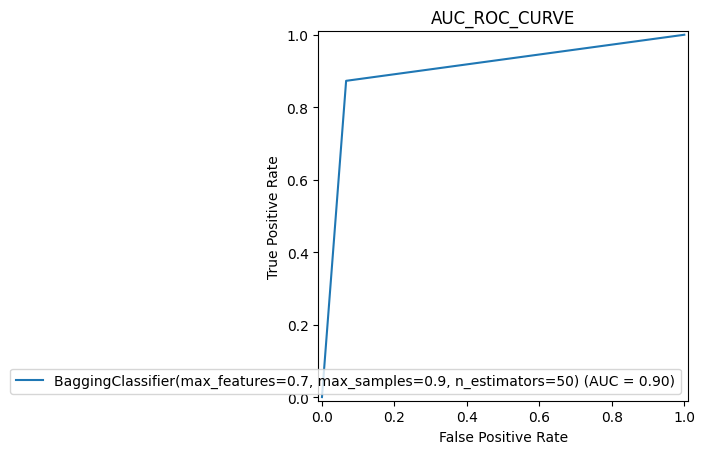

In [841]:
# Plotting Graph
fpr,tpr,thresholds=roc_curve(ytest,ModelBGC)
roc_auc=auc(fpr,tpr)
graph=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Model_bgc)
graph.plot()
plt.title('AUC_ROC_CURVE')
plt.show()

# Saving Model

In [842]:
#importing pickle
import pickle

In [851]:
filename='Titanic_survivor.pkl'

In [852]:
# Saving file
pickle.dump(Model_bgc,open(filename,'wb'))